In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [98]:
data= pd.read_csv('diabetes2.csv')

In [99]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
data.shape

(768, 9)

In [101]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [102]:
x = data[['Glucose', 'Age', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']].values
y=data['Outcome'].values
print(x.shape)
print(y.shape)

(768, 8)
(768,)


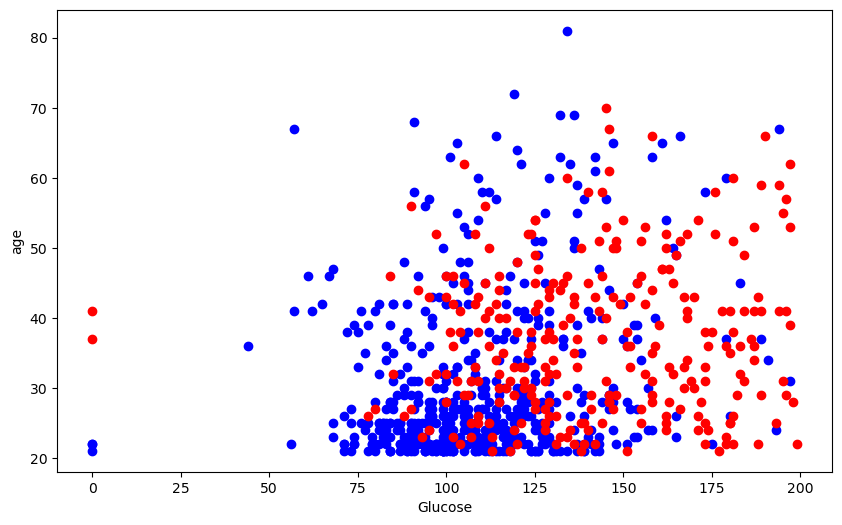

In [103]:
plt.figure(figsize=(10,6))
plt.scatter(x[y==0][:,0],x[y==0][:,1],color="b",label='0')
plt.scatter(x[y==1][:,0],x[y==1][:,1],color="r",label='1')
plt.xlabel('Glucose')
plt.ylabel('age')
plt.show()


In [113]:
class LogisticRegression:
    def __init__(self,l_rate=0.01,iteration=1000):
        self.l_rate=l_rate
        self.iteration=iteration

    def fit(self,x,y):
        self.losses=[]
        self.theta=np.zeros((1+x.shape[1]))
        n=x.shape[0]
        for i in range(self.iteration):
            y_pred=self.theta[0]+np.dot(x,self.theta[1:])
            z=y_pred
            g_z=1/(1+np.e**(-z))
            cost =(-y*np.log(g_z)-(1-y)*np.log(1-g_z))/n   
            self.losses.append(cost)
            d_theta1=(1/n)* np.dot(x.T,(g_z-y))
            d_theta0=(1/n)* np.sum(g_z-y)
            self.theta[1:]=self.theta[1:]-self.l_rate*d_theta1
            self.theta[0]=self.theta[0]-self.l_rate*d_theta0
        return self
    def predict(self,x):
        y_pred=self.theta[0]+np.dot(x,self.theta[1:])
        z = y_pred
        g_z = 1 / (1 + np.e**(-z))
        return [1 if i > 0.5 else 0 for i in g_z] #Threshold  

In [114]:
def scale(x):
    x_scaled=x-np.mean(x,axis=0)
    x_scaled=x_scaled/np.std(x,axis=0)
    return x_scaled

In [115]:
x_sd=scale(x)
x_sd

array([[ 0.84832379,  1.4259954 ,  0.63994726, ..., -0.69289057,
         0.20401277,  0.46849198],
       [-1.12339636, -0.19067191, -0.84488505, ..., -0.69289057,
        -0.68442195, -0.36506078],
       [ 1.94372388, -0.10558415,  1.23388019, ..., -0.69289057,
        -1.10325546,  0.60439732],
       ...,
       [ 0.00330087, -0.27575966,  0.3429808 , ...,  0.27959377,
        -0.73518964, -0.68519336],
       [ 0.1597866 ,  1.17073215, -0.84488505, ..., -0.69289057,
        -0.24020459, -0.37110101],
       [-0.8730192 , -0.87137393, -0.84488505, ..., -0.69289057,
        -0.20212881, -0.47378505]])

In [116]:
model=LogisticRegression()
model.fit(x_sd,y)

In [117]:
print("theta0:",model.theta[0])
print("theta1",model.theta[1])
print("theta2",model.theta[2])

theta0: -0.644143823578417
theta1 0.7875264176366341
theta2 0.22472252262055772


In [118]:
y_pred=model.predict(x_sd)
y_pred

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,


In [119]:
CM=confusion_matrix(y,y_pred,labels=[1,0])
print("confusion_matrix",CM)

confusion_matrix [[153 115]
 [ 62 438]]


In [120]:
TP=CM[0][0]
FP=CM[0][1]
FN=CM[1][0]
TN=CM[1][1]

In [121]:
ACC = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy is : \n', ACC)
print('--------------------------------')
Rec = TP/(TP+FN)
print('Recall is : \n', Rec)
print('--------------------------------')
Prec = TP/(TP+FP)
print('Precsion is : \n', Prec)
print('--------------------------------')
F1 = 2 * ((Prec * Rec)/(Prec + Rec))
print('F1 score is : \n', F1)
print('--------------------------------')

Accuracy is : 
 0.76953125
--------------------------------
Recall is : 
 0.7116279069767442
--------------------------------
Precsion is : 
 0.5708955223880597
--------------------------------
F1 score is : 
 0.6335403726708074
--------------------------------
